# Challenge 6

Topic: Classification Metrics<br>
Date: 10/28/2016 <br>
Name: Travis James <br>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
import statsmodels.formula.api as smf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.learning_curve import learning_curve
from sklearn.metrics import precision_recall_fscore_support

%matplotlib inline

**Challenge 6.1**

In [24]:
df_vote = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', header=None)
for index in range(1, 17):
    df_vote[index] = df_vote[index].map(lambda x: 1 if x == 'y' else 0 if x == 'n' else np.nan)
df_vote[0] = df_vote[0].map(lambda y: 1 if y == 'democrat' else 0)
df_vote = df_vote.fillna(df_vote.mean())
y = df_vote[0]
X = df_vote.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4444)

In [25]:
knn = KNeighborsClassifier(n_neighbors = 9).fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
prec_knn, recall_knn, f1_knn, support_knn = precision_recall_fscore_support(y_test, y_pred_knn)
print(acc_knn, prec_knn, recall_knn, f1_knn)

0.931297709924 [ 0.9245283   0.93589744] [ 0.90740741  0.94805195] [ 0.91588785  0.94193548]


In [26]:
logit = LogisticRegression().fit(X_train, y_train)
y_pred_logit = logit.predict(X_test)
acc_logit = accuracy_score(y_test, y_pred_logit)
prec_logit, recall_logit, f1_logit, support_logit = precision_recall_fscore_support(y_test, y_pred_logit)
print(acc_logit, prec_logit, recall_logit, f1_logit)

0.93893129771 [ 0.96        0.92592593] [ 0.88888889  0.97402597] [ 0.92307692  0.94936709]


In [27]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test, y_pred_gnb)
prec_gnb, recall_gnb, f1_gnb, support_gnb = precision_recall_fscore_support(y_test, y_pred_gnb)
print(acc_gnb, prec_gnb, recall_gnb, f1_gnb)

0.93893129771 [ 0.97916667  0.91566265] [ 0.87037037  0.98701299] [ 0.92156863  0.95      ]


In [28]:
from sklearn.svm import SVC

svc = SVC().fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred_svc)
prec_svc, recall_svc, f1_svc, support_svc = precision_recall_fscore_support(y_test, y_pred_svc)
print(acc_svc, prec_svc, recall_svc, f1_svc)

0.954198473282 [ 0.96153846  0.94936709] [ 0.92592593  0.97402597] [ 0.94339623  0.96153846]


In [29]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier().fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
acc_dtc = accuracy_score(y_test, y_pred_dtc)
prec_dtc, recall_dtc, f1_dtc, support_dtc = precision_recall_fscore_support(y_test, y_pred_dtc)
print(acc_dtc, prec_dtc, recall_dtc, f1_dtc)

0.93893129771 [ 0.94230769  0.93670886] [ 0.90740741  0.96103896] [ 0.9245283   0.94871795]


In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf, recall_rf, f1_rf, support_rf = precision_recall_fscore_support(y_test, y_pred_rf)
print(acc_rf, prec_rf, recall_rf, f1_rf)

0.961832061069 [ 0.98039216  0.95      ] [ 0.92592593  0.98701299] [ 0.95238095  0.96815287]


**Challenge 6.2**

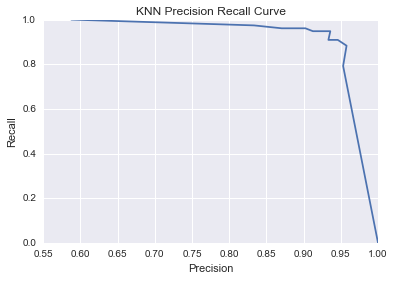

In [33]:
from sklearn.metrics import precision_recall_curve

precision_knn, recall_knn, threshold_knn = precision_recall_curve(y_test, knn.predict_proba(X_test)[:, 1])
plt.plot(precision_knn, recall_knn)
plt.title('KNN Precision Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall');

AUC: 0.946127946128


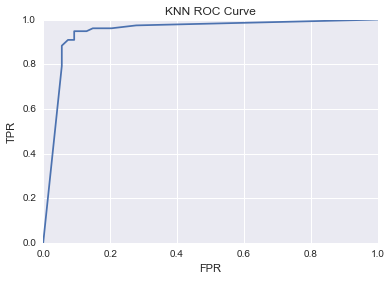

In [43]:
from sklearn.metrics import roc_curve, auc

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
plt.plot(fpr_knn, tpr_knn)
plt.title('KNN ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR');

print("AUC: " + str(auc(fpr_knn, tpr_knn)))

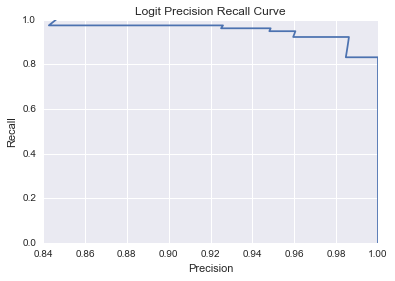

In [39]:
precision_logit, recall_logit, threshold_logit = precision_recall_curve(y_test, logit.predict_proba(X_test)[:, 1])
plt.plot(precision_logit, recall_logit)
plt.title('Logit Precision Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall');

AUC: 0.987734487734


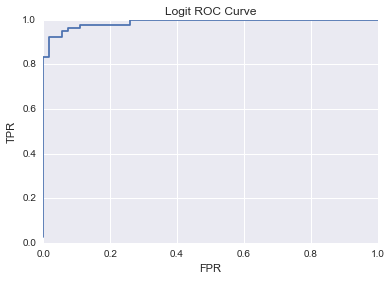

In [44]:
fpr_logit, tpr_logit, thresholds_logit = roc_curve(y_test, logit.predict_proba(X_test)[:, 1])
plt.plot(fpr_logit, tpr_logit)
plt.title('Logit ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR');

print("AUC: " + str(auc(fpr_logit, tpr_logit)))

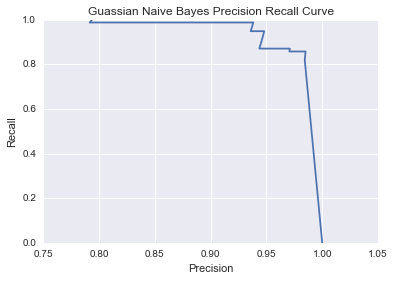

In [45]:
precision_gnb, recall_gnb, threshold_gnb = precision_recall_curve(y_test, gnb.predict_proba(X_test)[:, 1])
plt.plot(precision_gnb, recall_gnb)
plt.title('Guassian Naive Bayes Precision Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall');

AUC: 0.977032227032


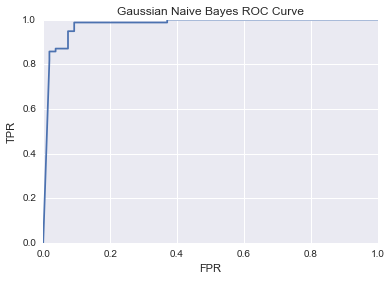

In [46]:
fpr_gnb, tpr_gnb, thresholds_gnb = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1])
plt.plot(fpr_gnb, tpr_gnb)
plt.title('Gaussian Naive Bayes ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR');

print("AUC: " + str(auc(fpr_gnb, tpr_gnb)))

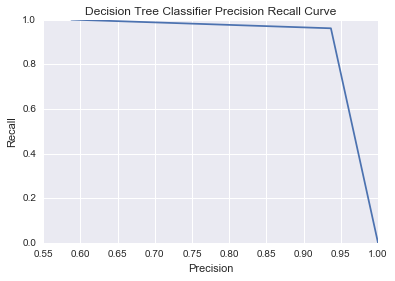

In [48]:
precision_dtc, recall_dtc, threshold_dtc = precision_recall_curve(y_test, dtc.predict_proba(X_test)[:, 1])
plt.plot(precision_dtc, recall_dtc)
plt.title('Decision Tree Classifier Precision Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall');

AUC: 0.934223184223


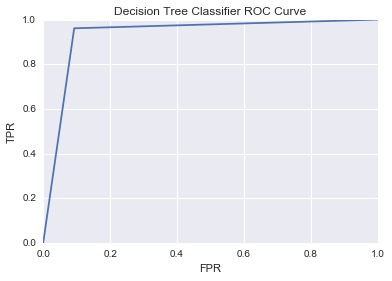

In [49]:
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(y_test, dtc.predict_proba(X_test)[:, 1])
plt.plot(fpr_dtc, tpr_dtc)
plt.title('Decision Tree Classifier ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR');

print("AUC: " + str(auc(fpr_dtc, tpr_dtc)))

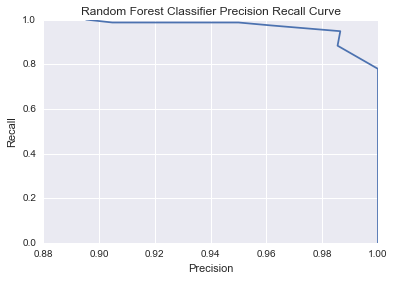

In [50]:
precision_rf, recall_rf, threshold_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(precision_rf, recall_rf)
plt.title('Random Forest Classifier Precision Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall');

AUC: 0.993987493987


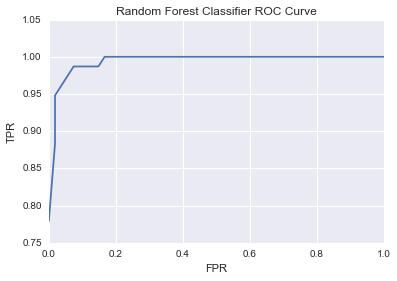

In [51]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf)
plt.title('Random Forest Classifier ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR');

print("AUC: " + str(auc(fpr_rf, tpr_rf)))

**Challenge 6.3**

In [67]:
bcs_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None)

In [69]:
bcs_df[3] = bcs_df[3].map(lambda y: 1 if y == 2 else 0)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(bcs_df.iloc[:,:3], bcs_df.iloc[:,3], test_size=0.3)

In [72]:
logit_survival = LogisticRegression().fit(X_train, y_train)

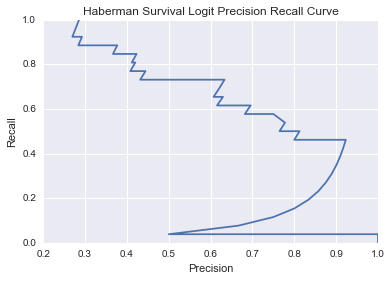

In [75]:
precision_surv, recall_surv, threshold_surv = precision_recall_curve(y_test, logit_survival.predict_proba(X_test)[:, 1])
plt.plot(precision_surv, recall_surv)
plt.title('Haberman Survival Logit Precision Recall Curve')
plt.xlabel('Precision')
plt.ylabel('Recall');

AUC: 0.993987493987


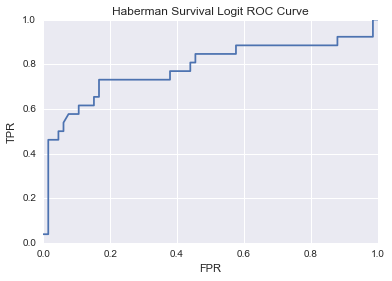

In [76]:
fpr_surv, tpr_surv, thresholds_surv = roc_curve(y_test, logit_survival.predict_proba(X_test)[:, 1])
plt.plot(fpr_surv, tpr_surv)
plt.title('Haberman Survival Logit ROC Curve')
plt.xlabel('FPR')
plt.ylabel('TPR');

print("AUC: " + str(auc(fpr_rf, tpr_rf)))